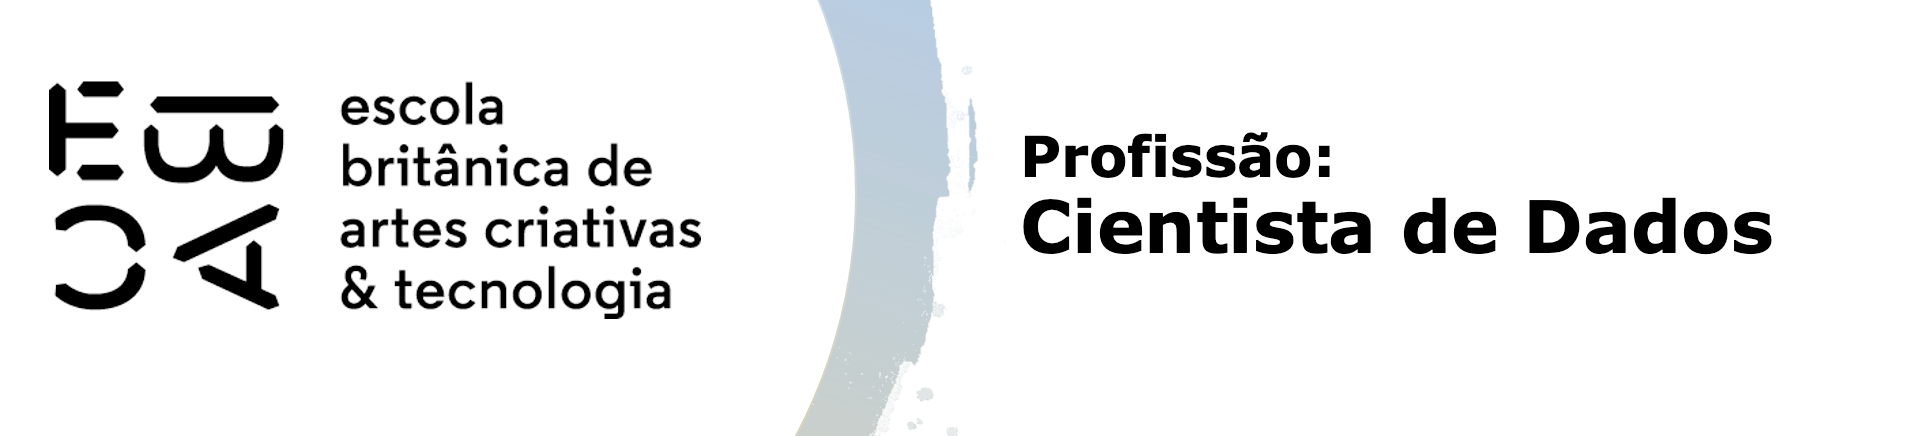

# Módulo 29 - K-Means

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

## 0. Carregamento de dados 
Os pacotes necessários para esta tarefa são:
- pandas, para leitura e edição de dados;
- matplotlib.pyplot, usado para criação e análise gráfica;
- seaborn, sendo este um complemento ao matplotlib.pyplot, com uma análise gráfica mais estatística; 
- numpy, para aplicações algébricas aos dados;
- KMeans do pacote sklearn.cluster para utilizar a técnica K-Means;
- StandarScaler do pacote sklearn.preporcessing para padronização dos dados;
- silhouette_score do pacote sklearn.metrics para utilizar o método de silueta; 
- tdqm do pacote tdqm.notebook que mostra o progresso do carregamento dos dados.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

>Os dados mencionados no enunciado encontram-se no arquivo "online_shoppers_intention.csv". Vamos carregar este arquivo e fazer a contagem de pessoas que realizaram as compras.

In [50]:
# Cria um dataframe com os dados do arquivo csv
df = pd.read_csv('online_shoppers_intention.csv')

In [51]:
# Mostra as 5 primeiras linhas do dataframe
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [52]:
# Conta a quantidade de pessoas que compraram, ou não, na internet 
(nao, sim) = df.Revenue.value_counts(dropna=False)

# Imprime os números de pessoas obtidos
print(f'Número de pessoas que compraram online: {sim}')
print(f'Número de pessoas que não compraram online: {nao}')

Número de pessoas que compraram online: 1908
Número de pessoas que não compraram online: 10422


## 1. Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

> Vamos iniciar esta seção analisando a distribuição de todas as variáveis do dataframe.

In [53]:
# Mostra os tipos das variáveis e quantidade de linhas não nulas em cada uma
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [54]:
# Mostra a quantidade de valores presentes em cada variável.
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [55]:
# Confirmando que não há valores nulas nas variáveis
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

> Para as variáveis numéricas, vejamos seus valores máximos, mínimos, média, desvio padrão e quartis.

In [56]:
# Mostra as quantidades mencionadas acima
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

> As análises mostram que nenhuma das variáveis do dataframe apresenta valores missings. Além disso, todas as variáveis do escopo são numéricas. Vamos agora analisar apenas as relações entre as variáveis do escopo.

In [57]:
# Lista com os nomes das variáveis do escopo
escopo = ['Administrative', 'Administrative_Duration', 'Informational',
          'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

> Para uma melhor visualização das distribuições das variáveis, façamos a análise gráfica que as relaciona.

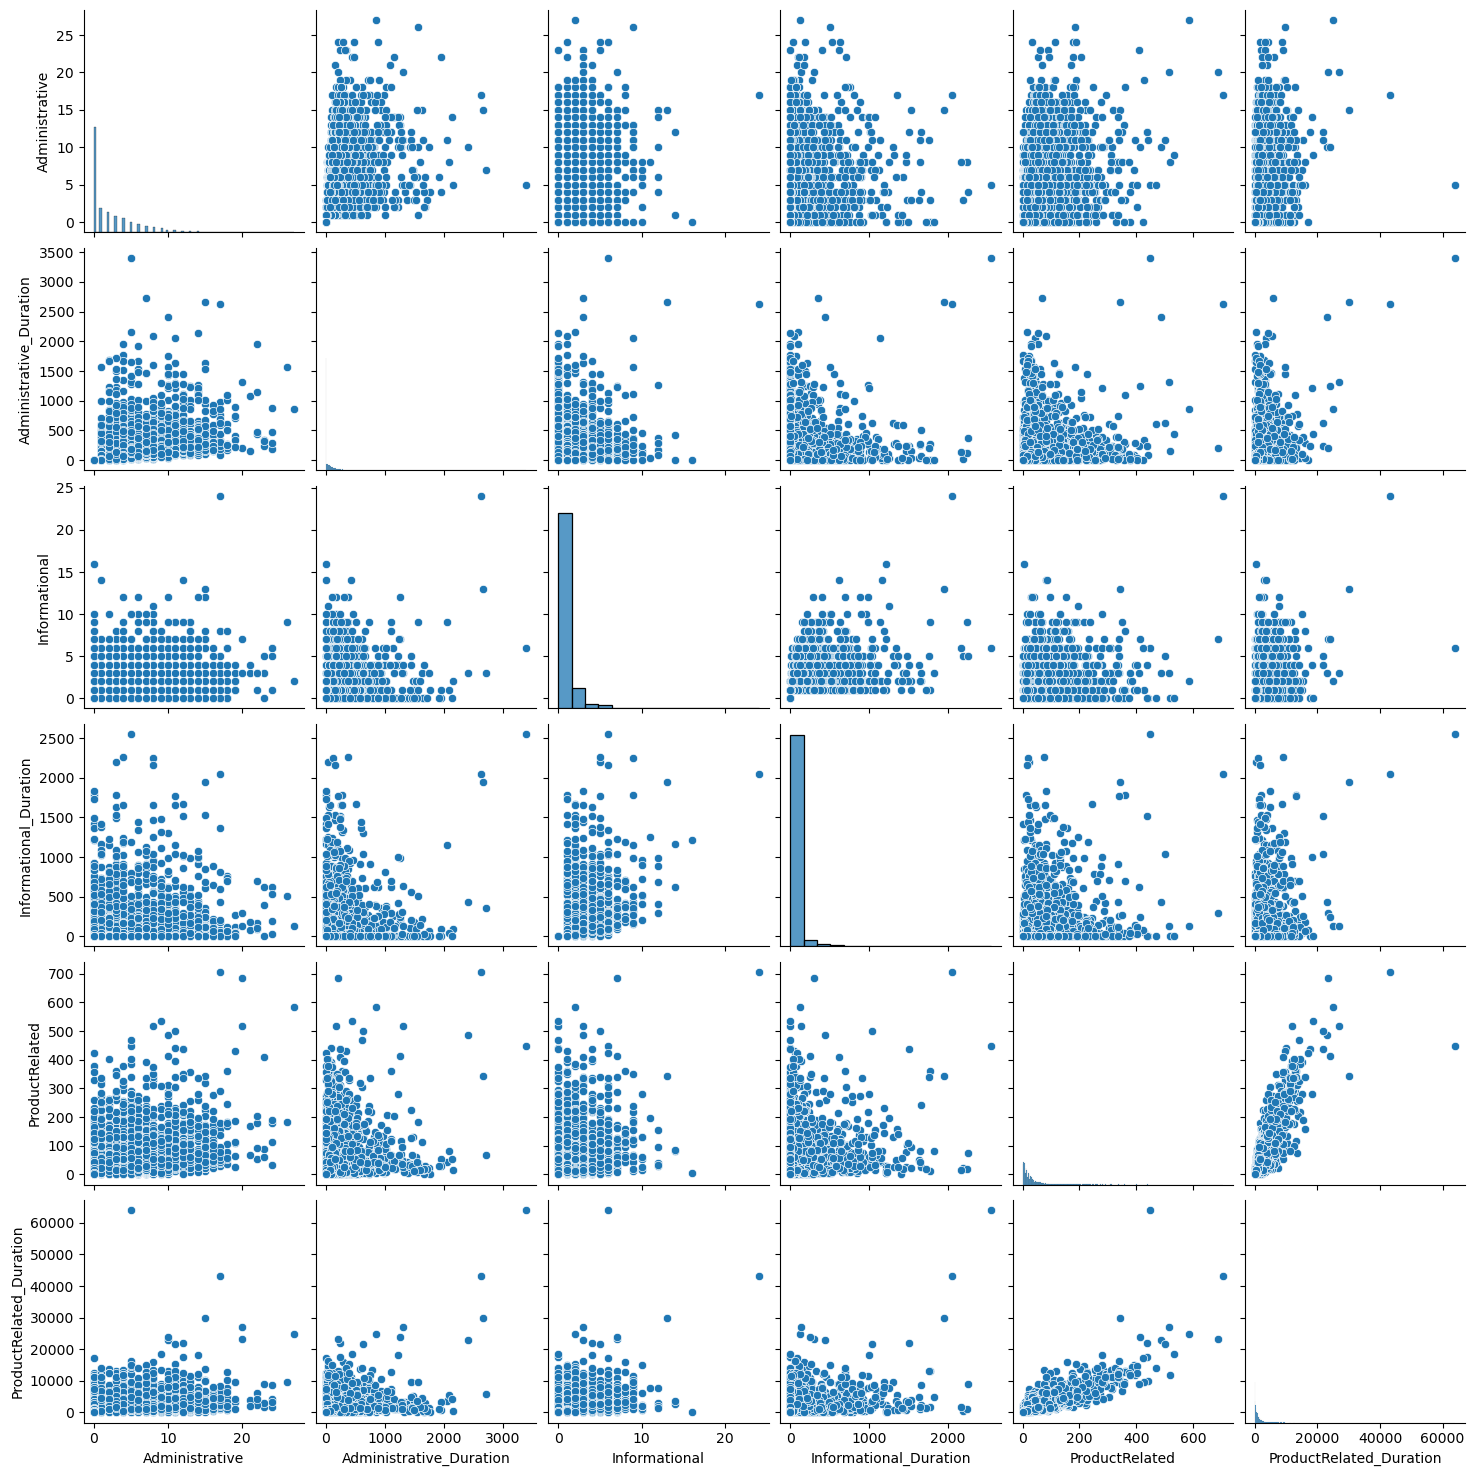

In [58]:
# Gráfico "pair plot" das variáveis do escopo
sns.pairplot(data=df[escopo])
plt.show()

> Os gráficos, em geral, não mostraram comportamentos relacionados entre as variáveis, com exceção do penúltimo que relaciona "ProductRelated_Duration" e "ProductRelated" de forma linear visualmente. Entretanto, devemos lembrar que as variáveis estão em seus valores originais, com medidas de grandeza diferentes entre si. Vejamos se a padronização delas trás melhores resultados. Ou seja, deixá-las com média zero e desvio padrão igual a 1.
>
> Sejão, então, df_num o dataframe com apenas as variáveis numéricas do original, e df_num_pad o dataframe com todas as variáveis numéricas padronizadas.

In [59]:
# Seleciona as variáveis numéricas do dataframe
df_num = df.select_dtypes(include="number")

# Mostra as primeiras linhas das variáveis numéricas
df_num.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  Browser  \
0         0.20       0.20         0.0         0.0                 1        1   
1         0.00       0.10         0.0         0.0                 2        2   
2         0.20       0.20         0.0         0.0                 4        1   
3         0.05       0.14         0.0         0.0                 3        2   
4         0.02       0.05         0.0         0.0                 3        3   

   Region  TrafficType  
0       1            1  
1       1            2  
2       9            3  
3       2            4  
4       1            4

In [60]:
# Padroniza todas as variáveis numéricas
df_num_pad = pd.DataFrame(StandardScaler().fit_transform(df_num), columns=df_num.columns)

# Mostra as 5 primeiras linhas padronizadas
df_num_pad.head()

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems   Browser  \
0     3.667189   3.229316   -0.317178   -0.308821         -1.233426 -0.790293   
1    -0.457683   1.171473   -0.317178   -0.308821         -0.136078 -0.207952   
2     3.667189   3.229316   -0.317178   -0.308821          2.058618 -0.790293   
3     0.573535   1.994610   -0.317178   -0.308821          0.961270 -0.207952   
4    -0.045196   0.142551   -0.317178   -0.308821          0.961270  0.374389   

     Region  TrafficType  
0 -0.894178    -0.762629  
1 -0.894178    -0.514182  
2  2.437081    -0.265735  
3 -0.477771    -0.017289  
4 -0.894178    -0.017289

> Agora que as variáveis estão padronizadas, seja df_pad o dataframe com apenas as variáveis do escopo padronizadas.

In [61]:
# Seleciona as variáveis do escopo padronizadas
df_pad = df_num_pad[escopo].copy()

In [62]:
# Mostra a descrição estatística das variáveis padronizadas
df_pad.describe()

Administrative  Administrative_Duration  Informational  \
count    1.233000e+04             1.233000e+04   1.233000e+04   
mean    -1.375191e-15             2.072011e-15   6.987391e-15   
std      1.000041e+00             1.000041e+00   1.000041e+00   
min     -6.969930e-01            -4.571914e-01  -3.964779e-01   
25%     -6.969930e-01            -4.571914e-01  -3.964779e-01   
50%     -3.959377e-01            -4.147639e-01  -3.964779e-01   
75%      5.072280e-01             7.035981e-02  -3.964779e-01   
max      7.431499e+00             1.876956e+01   1.849960e+01   

       Informational_Duration  ProductRelated  ProductRelated_Duration  
count            1.233000e+04    1.233000e+04             1.233000e+04  
mean             1.761455e-16   -2.849753e-16             9.953199e-16  
std              1.000041e+00    1.000041e+00             1.000041e+00  
min             -2.449305e-01   -7.134884e-01            -6.243475e-01  
25%             -2.449305e-01   -5.560920e-01            -5.281214e-01  
50%             -2.449305e-01   -3.087548e-01            -3.113566e-01  
75%             -2.449305e-01    1.409492e-01             1.407881e-01  
max              1.786868e+01    1.513858e+01             3.280678e+01

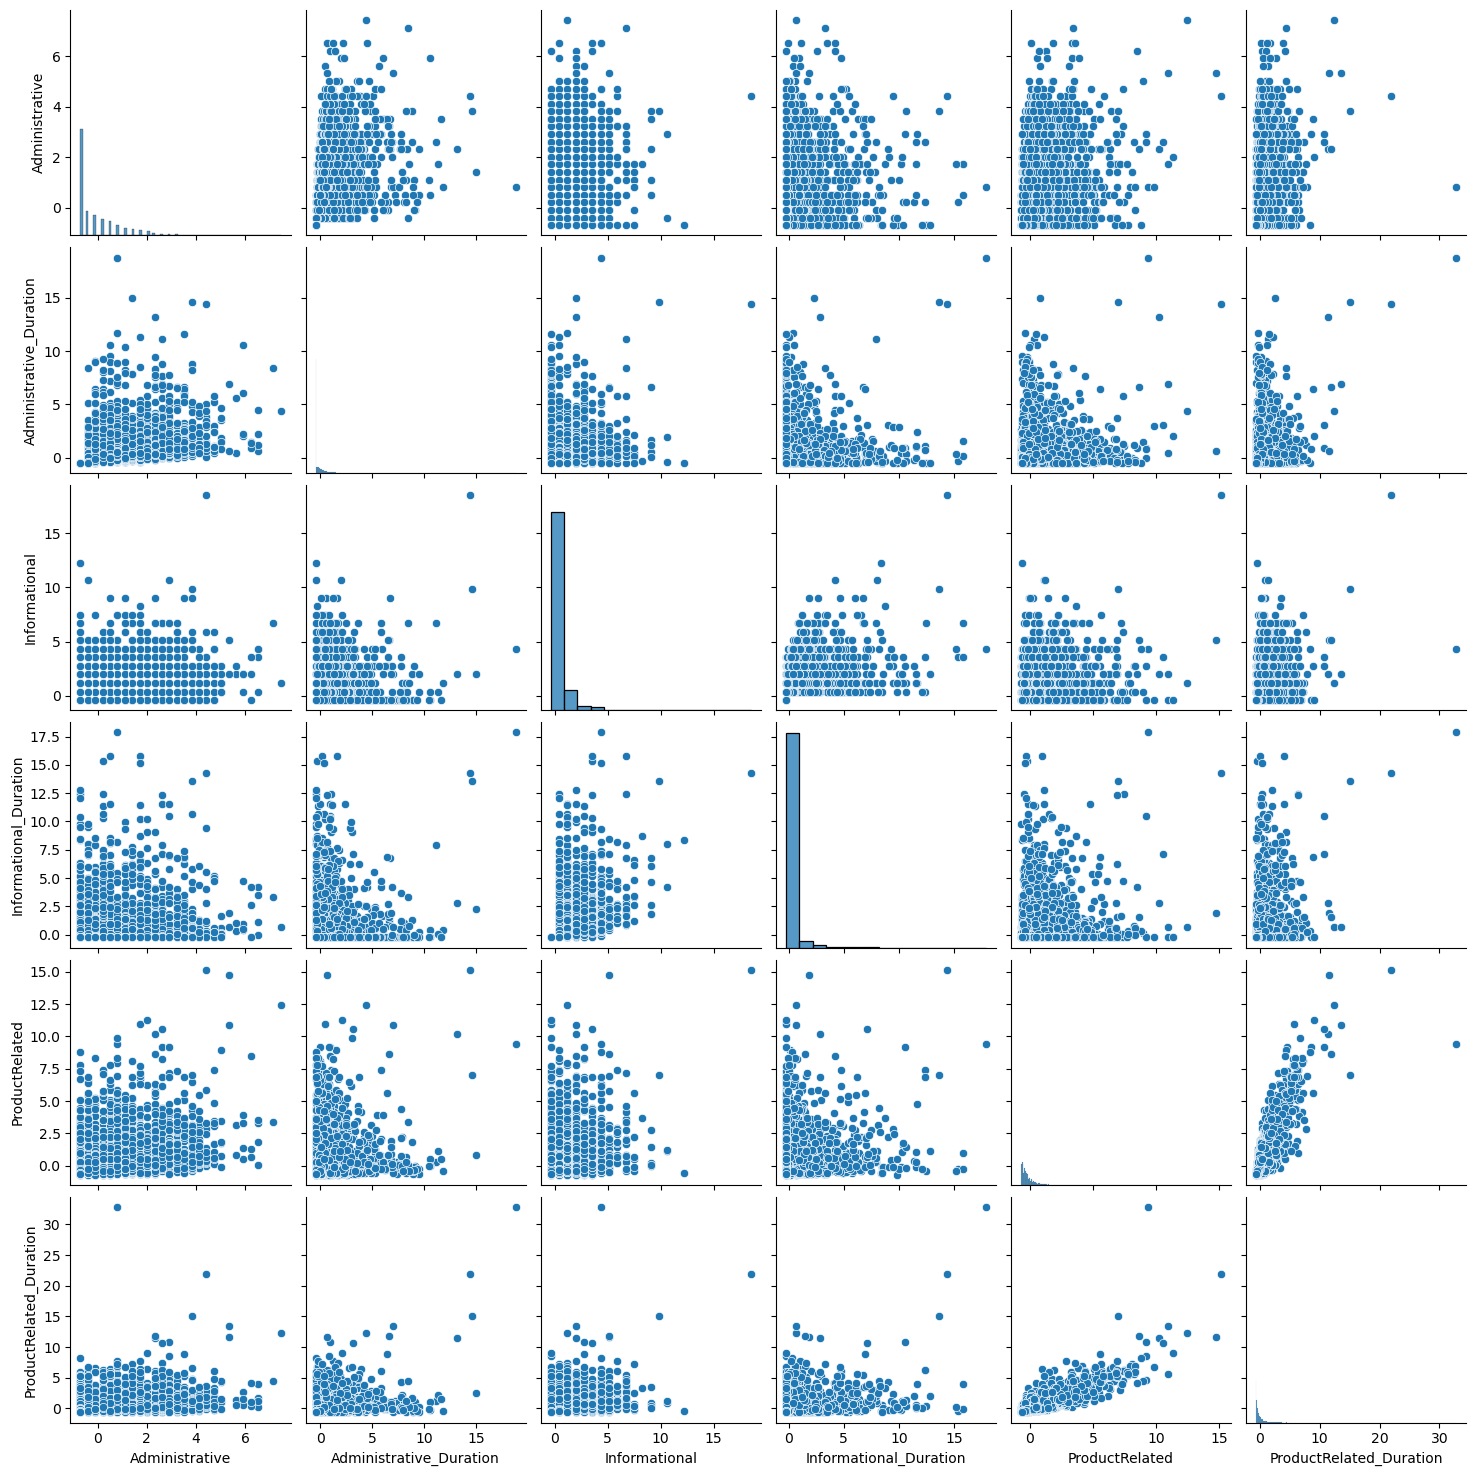

In [63]:
# Gráfico "pair plot" das variáveis padronizadas
sns.pairplot(data=df_pad)
plt.show()

> Verifica-se que a padronização apenas alterou a ordem de grandeza das variáveis, de forma que todas estejam no mesmo intervalo medido. A visualização gráfica, por outro lado, continua a mesma.

## 2. Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

> O número de grupos a serem utilizados será determinado de duas formas: 
> - __Método do Cotovelo__, que consiste de um gráfico da soma dos quadrados da distância (SQD) em função do número de clusters, com a quantidade de grupos a ser utilizada é a que muda a direção da reta do gráfico;
>
>
> - __Coeficiente de Silueta__, que para cada número de grupos são medidas as distâncias de cada componente em relação às outras dentro e fora do respectivo grupo. O coeficiente em questão depende da diferença entre as distâncias. Após os cálculos dos coeficientes, é feito o gráfico de coeficiente em função do número de clusters. A quantidade de clusters a ser usada é aquela em que a _silueta_ é maior.   

## 2.1 Método do Cotovelo
>Neste método, vamos utilizar entre 1 e 15 clusters para comparar o SQD do ajuste das variáveis padronizadas em cada caso.

In [64]:
# Lista em são inseridas as SQD
SQD = []

# Quantidades de Clusters a serem avaliadas
K = range(1,15)

# Aplica o K-Means na base padronizada e mede a SQD para cada k
for k in tqdm(K):
    km = KMeans(n_clusters=k, random_state=27)
    km = km.fit(df_pad[escopo])
    SQD.append(km.inertia_)

  0%|          | 0/14 [00:00<?, ?it/s]

In [65]:
# Visualização da lista com as SQD
SQD

[73980.00000000003,
 51210.55819891581,
 43201.809876142375,
 37325.99974986014,
 33467.671202929625,
 29687.979013066728,
 26820.78509353937,
 24156.88439095165,
 22476.089118866843,
 21047.733168437964,
 19703.187200007535,
 18862.242179393466,
 18063.85551718092,
 17317.887930768964]

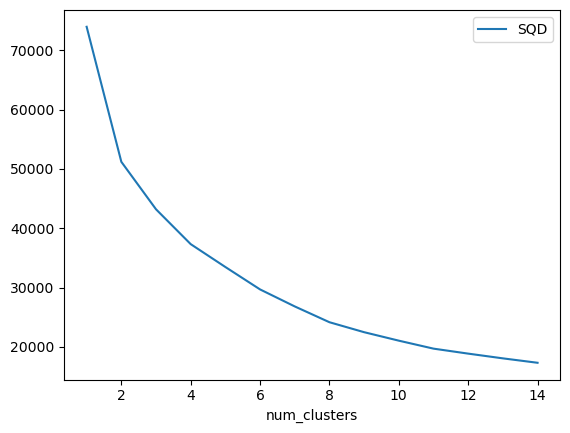

In [66]:
# Faz um dataframe com o número de clusters e dos SQD
df_elbow = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})

# Faz o gráfico SQD x número de clusters
df_elbow.plot(x = 'num_clusters', y = 'SQD')
plt.show()

>O gráfico do método do cotovelo mostra que há maiores mudanças na variação do SQD em 2, 3 e 4 clusters. Nos casos acima de 4 grupos, os pontos de mudança na reta são quase imperceptíveis.

## 2.2 Coeficiente da Silueta
>O método do cotovelo mostrou que a quantidade de grupos ideal está entre 2 e 4. Para não gastar muito tempo e consumo da máquina, vamos avaliar o coeficiente da Silueta entre 2 e 10 clusters.

In [67]:
# Inicializar uma lista vazia que vai conter os valores da silueta média
siluetas = []

# Este é o número máximo de grupos que vamos testar
max_clusters = 10

# O loop percorre de 2 até o máximo de clusters
for n_clusters in tqdm(range(2, max_clusters+1)):
    # Aqui rodamos o k-means
    km = KMeans(n_clusters=n_clusters, random_state=27).fit(df_pad[escopo])
    # Aqui calculamos a silueta e guardamos o resultado na lista 'siluetas'
    siluetas.append(silhouette_score(df_pad[escopo], km.labels_))
    # Essa list comprehension define o nome dos grupos
    nomes_grupos = ['grupo_' + str(g) for g in range(n_clusters)]
    # Agora vamos adicionar uma coluna no dataframe X_pad com o agrupamento construido
    df_pad['grupos_'+str(n_clusters)] = pd.Categorical.from_codes(km.labels_, categories = nomes_grupos)

  0%|          | 0/9 [00:00<?, ?it/s]

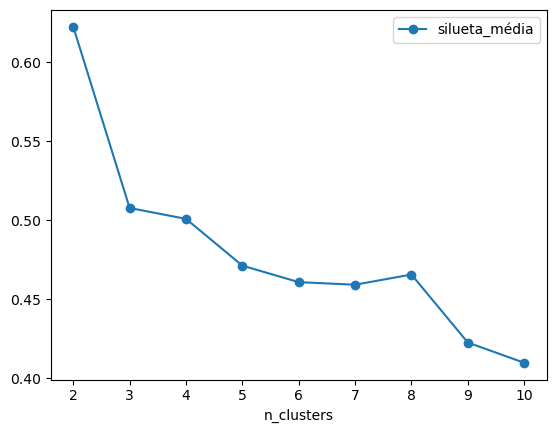

In [68]:
# Cria um dataframe com os valores de silueta média em cada quantidade de clusters
df_silueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silueta_média': siluetas})

# Faz e mostra o gráfico de silueta média por número de clusters
df_silueta.plot.line(x = 'n_clusters', y = 'silueta_média', marker='o')
plt.show()

>Os maiores valores de silueta média encontram-se entre 2, e 4 clusters, com destaque a 2 e 3. Por concordância entre os resultados dos dois métodos, vamos utilizar apenas 2 e 3 grupos para o K-Means na base padronizada.

## 3. Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

> A avaliação dos grupos consistira na análise dos gráficos de boxplots, pairplots e médias de cada variável do escopo para cada cluster dos conjuntos criados. Após as análises, os grupos serão nomeados de acordo com seus comportamentos em relação as variáveis explicativas.

### 3.1 Análise Descritiva para 2 clusters

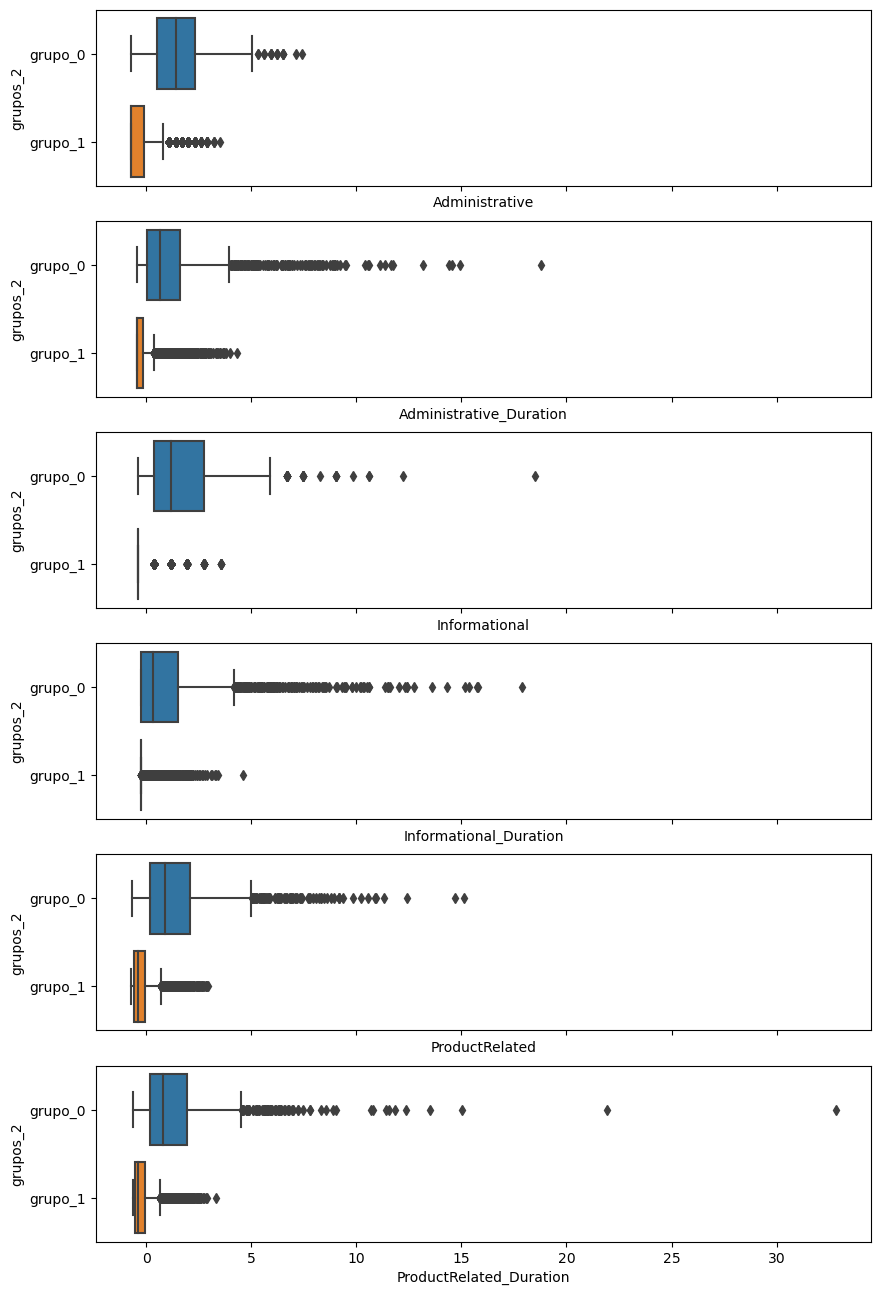

In [69]:
# Cria um conjunto de figuras onde serão inseridos os gráficos com o número de grupos 
# pela variável do conjunto
fig, ax = plt.subplots(6, 1, sharex=True, figsize=(10, 16))

# Monta o gráfico para cada variável
for i in range(6):
    sns.boxplot(x=df_pad.iloc[:, i], y='grupos_2', data=df_pad, ax=ax[i])
plt.show()

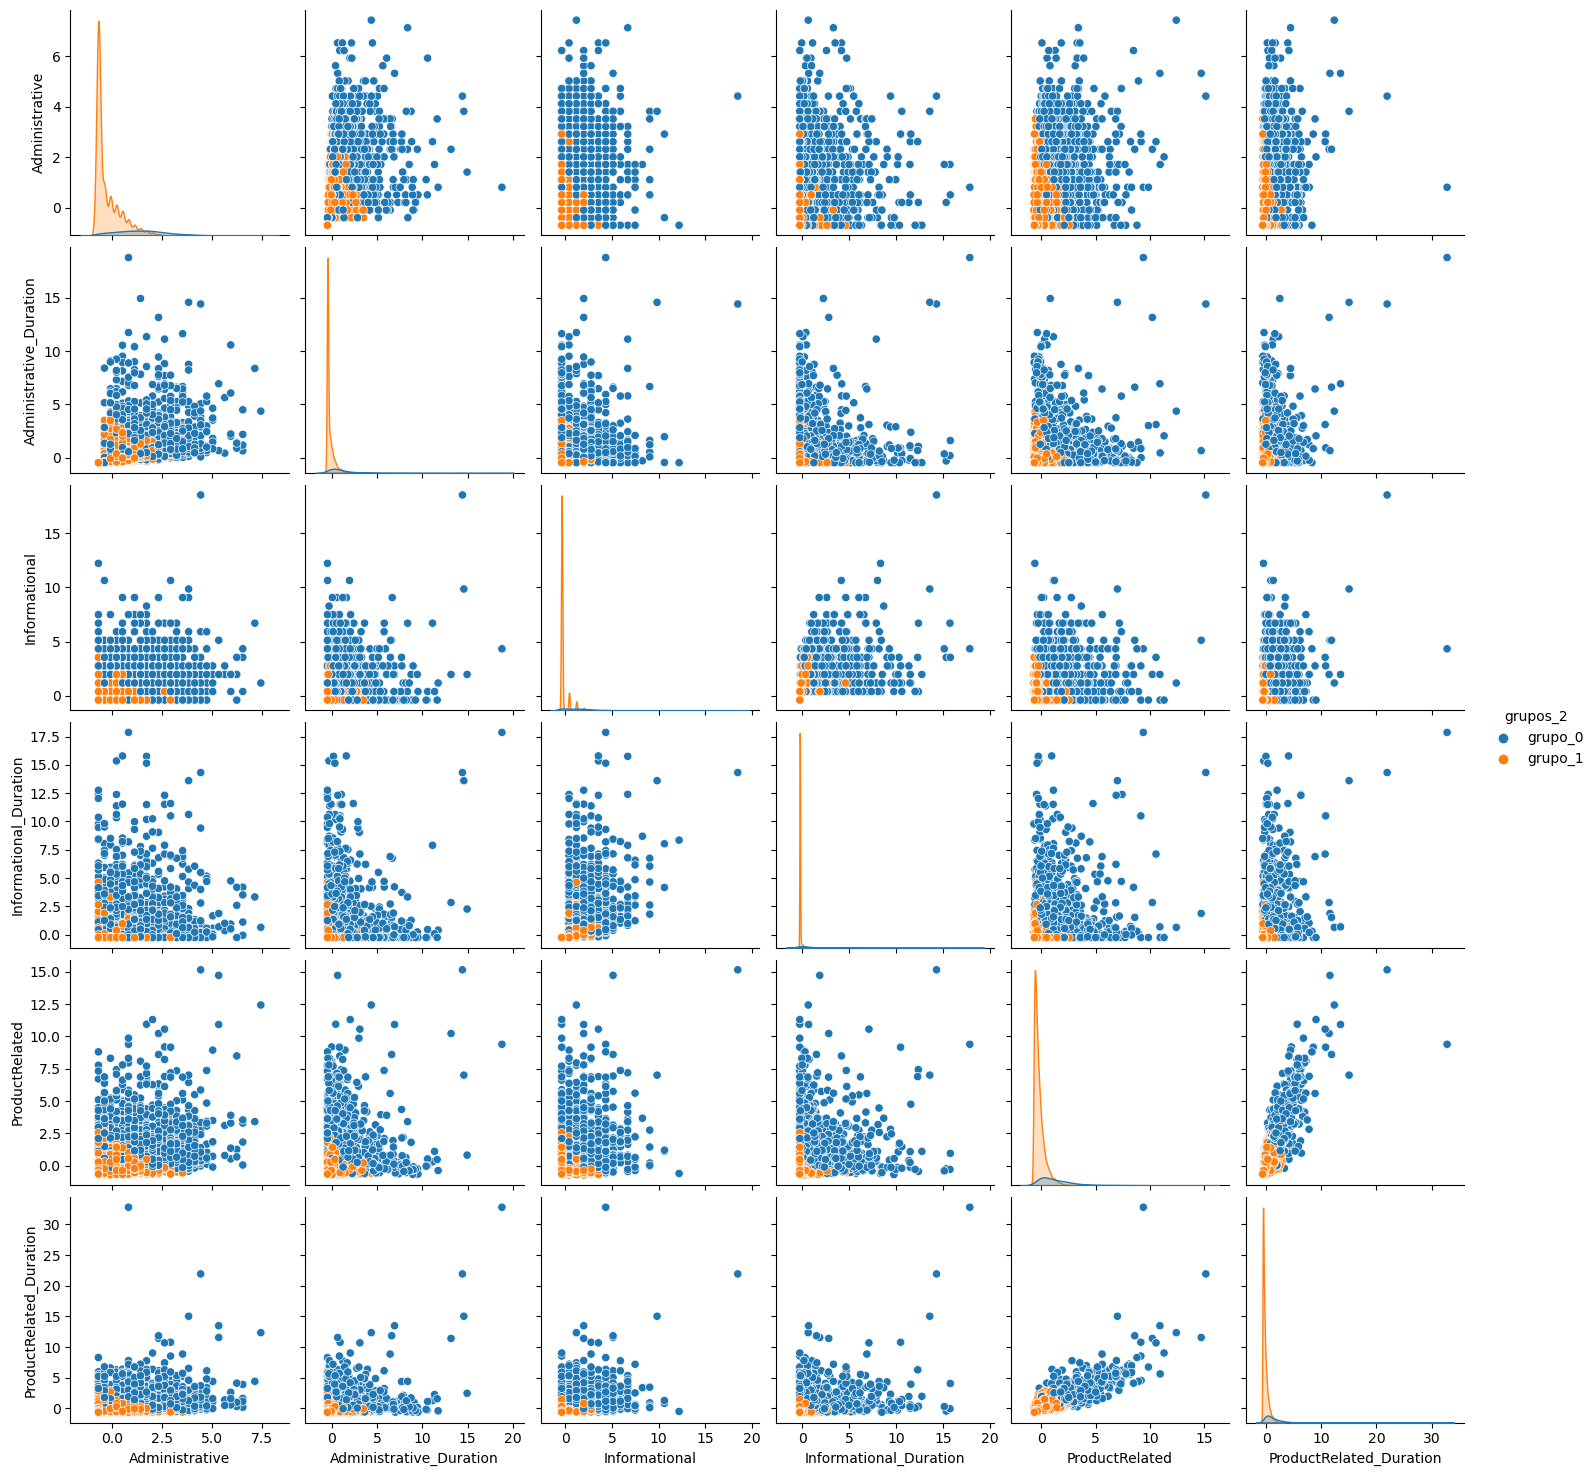

In [70]:
# Faz o pairplot das variáveis do escopo separadas pelo número do grupo
sns.pairplot(df_pad[escopo + ['grupos_2']], hue='grupos_2')
plt.show()

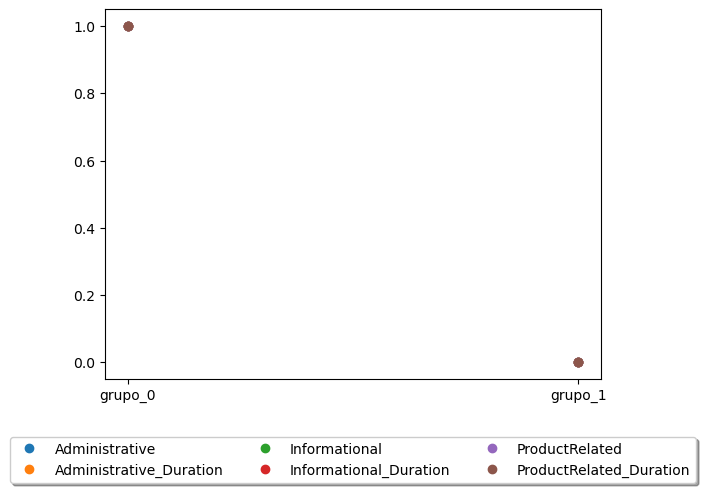

In [71]:
# Função que padroniza uma variável
padroniza = lambda x: (x - x.min())/(x.max() - x.min())

# Gráfico da média padronizada de cada variável do escopo para cada grupo
plt.plot(df_pad.groupby(['grupos_2'])[escopo].mean().apply(padroniza), 'o')
plt.legend(escopo, loc='lower center', bbox_to_anchor=(0.5, -.3),
          ncol=3, fancybox=True, shadow=True)
plt.show()

> Nos boxplots das variáveis do escopo para 2 grupos, desconsiderando os outlayers, o intervalo de cada variável é facilmente diferenciável em cada grupo, sendo que no grupo_1, os valores são negativos, enquanto que no grupo_0, os valores são positivos.
>
> No pairplot, em geral, nota-se uma boa diferença entre a distribuição dos dois grupos, com predomínio do grupo 0. O grupo está nos menores valores de cada variável.
>
> O gráfico das médias padronizadas de cada variável em função dos grupos, vemos dois extremos, com todas os valores do grupo 1 próximas a zero, enquanto que no grupo 0, as médias estão próximas de 1. 

In [72]:
# Renomeia os clusters
df_pad['grupos_2'] = df_pad['grupos_2'].cat.rename_categories({'grupo_0': 'Interessados', 
                                                               'grupo_1': 'Não Interessados'})

In [73]:
# Faz a contagem dos clusters na coluna grupos_2
df_pad.grupos_2.value_counts()

Não Interessados    10578
Interessados         1752
Name: grupos_2, dtype: int64

### 3.2 Análise Descritiva para 3 clusters

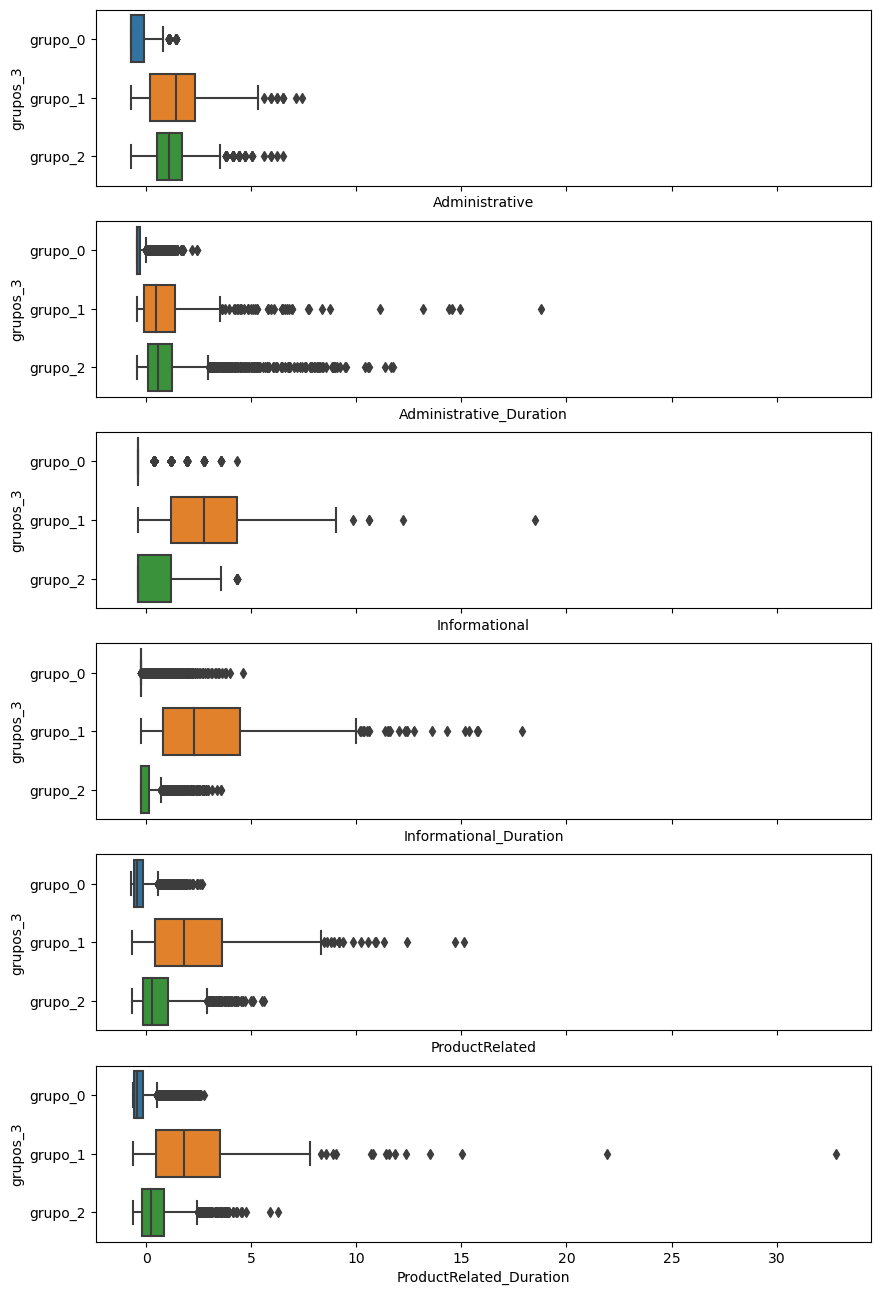

In [74]:
# Cria um conjunto de figuras onde serão inseridos os gráficos com o número de grupos 
# pela variável do conjunto
fig, ax = plt.subplots(6, 1, sharex=True, figsize=(10, 16))

# Monta o gráfico para cada variável
for i in range(6):
    sns.boxplot(x=df_pad.iloc[:, i], y='grupos_3', data=df_pad, ax=ax[i])
plt.show()

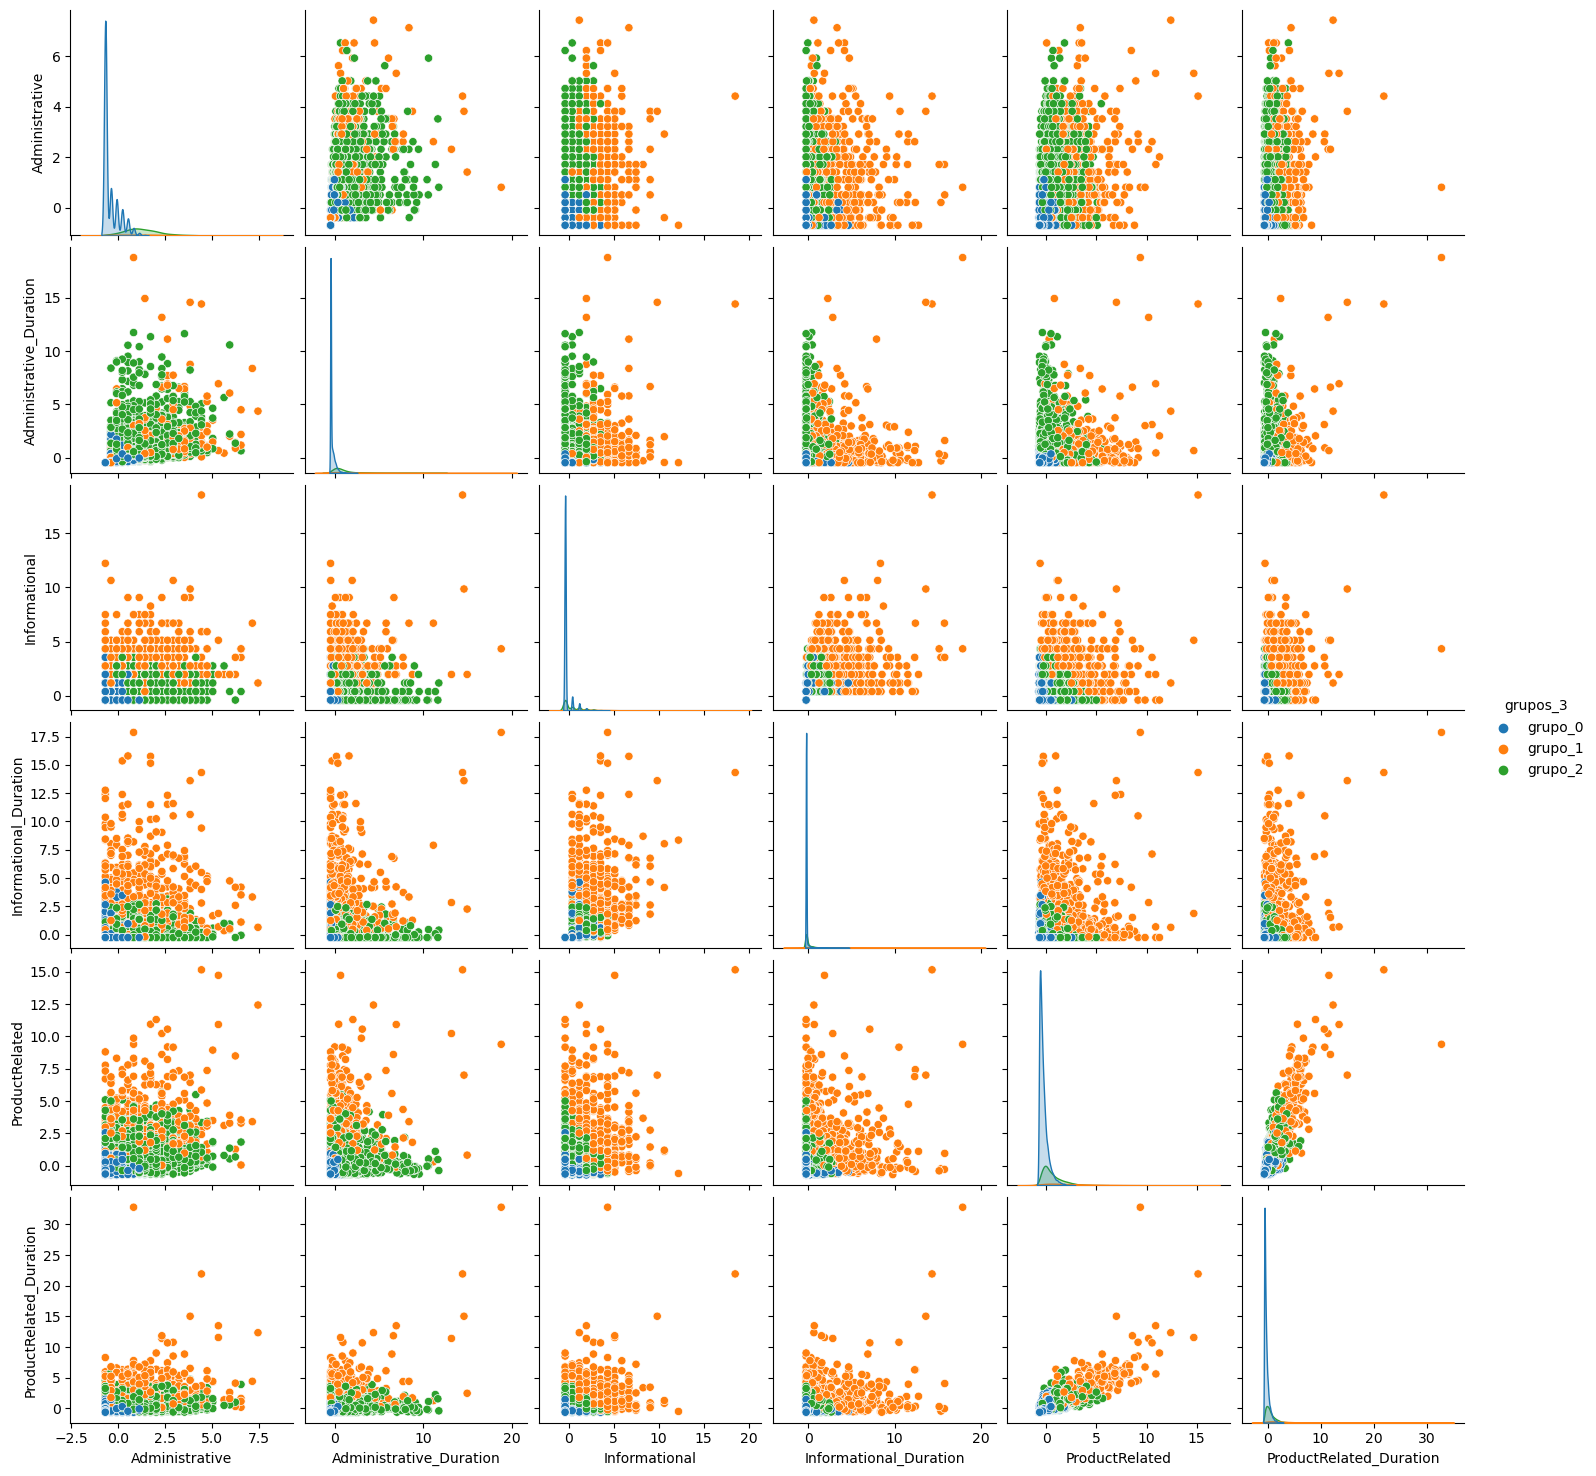

In [75]:
# Faz o pairplot das variáveis do escopo separadas pelo número do grupo
sns.pairplot(df_pad[escopo + ['grupos_3']], hue='grupos_3')
plt.show()

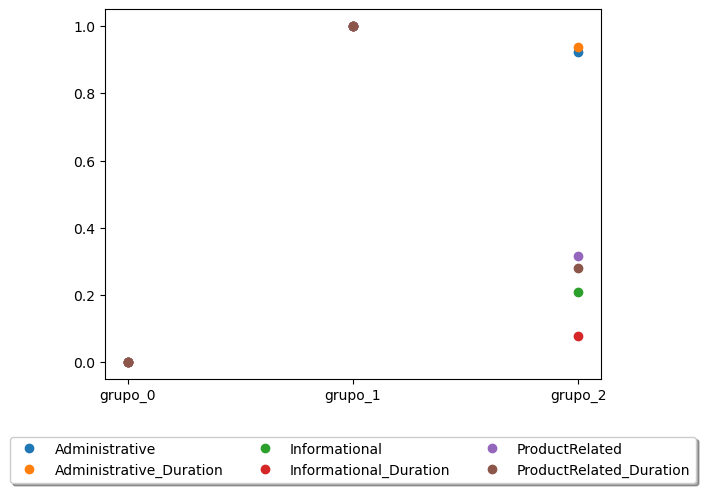

In [76]:
# Função que padroniza uma variável
padroniza = lambda x: (x - x.min())/(x.max() - x.min())

# Gráfico da média padronizada de cada variável do escopo para cada grupo
plt.plot(df_pad.groupby(['grupos_3'])[escopo].mean().apply(padroniza), 'o')
plt.legend(escopo, loc='lower center', bbox_to_anchor=(0.5, -.3),
          ncol=3, fancybox=True, shadow=True)
plt.show()

> Nos boxplots dos 3 clusters em função das variáveis do escopo, notam-se diferenças entre as medianas das variáveis em cada grupo, com excessão das duas ligadas às páginas administrativas (_Administrative_ e _Administrative_Duration_) onde o boxplot do grupo 2 está dentro do intervalo do boxplot do grupo 1.
>
> Em relação ao pairplot, grande parte dos gráficos têm predomínio dos grupos 1 ou 2, sendo que o grupo 1 (em geral) encontra-se nos maiores valores das variáveis. No caso caso do grupo 0, ele aparece nos menores valores das variáveis. Essas informações mostram que, visualmente, é possível diferenciar os grupos criados.
>
> No gráfico das médias das variáveis em função dos clusters notam-se casos extremos nos grupos 0 e 1, com todas as variáveis tendo média padronizada nula no grupo 0, enquanto que estão com a média igual a 1 no grupo 1. No caso do grupo 2, os valores das médias variaram, sendo _Administrative_ e _Administrative_Duration_ as com maiores valores.
>
> Com essas informações, vemos que as pessoas no grupo 1 passam mais tempo e entram mais vezes em todas as páginas do que os outros grupos, enquanto que o grupo 0 ocorre o oposto. No grupo 2, temos o meio termo, ou seja, as pessoas não deixam de entrar nas páginas e visualizá-las, mas não na mesma intensidade do grupo 1. Dessa forma, vamos chamar os clusters deste conjunto de: 
>- grupo_0: Não Interessados
>- grupo_1: Interessados
>- grupo_2: Indecisos

In [77]:
# Renomeia os clusters
df_pad['grupos_3'] = df_pad['grupos_3'].cat.rename_categories({'grupo_0': 'Não Interessados', 
                                                               'grupo_1': 'Interessados', 
                                                               'grupo_2': 'Indecisos'})

In [78]:
# Faz a contagem dos clusters na coluna grupos_3
df_pad.grupos_3.value_counts()

Não Interessados    9331
Indecisos           2449
Interessados         550
Name: grupos_3, dtype: int64

### 3.3 Agrupamento Final
> Os resultados das análises de cada conjunto de clusters mostram que é melhor utilizar 3 grupos do que 2, uma vez que a utilização de 2 grupos leva a resultados extremos (ou a pessoa está curiosa em relação a algum produto, ou em nenhum), enquanto que para 3 grupos, temos o meio termo, com pessoas que visualizaram as páginas relacionadas ao produto por um tempo e número de vezes que demonstram interesse. Assim, a avaliação dos resultados será feita sobre 3 clusters.
>
> Para facilitar a visualização dos dados do dataframe na próxima seção, vamos deixar apenas as variáveis do escopo e a coluna grupos_3 no dataframe padronizado em questão.

In [82]:
# Remove os conjuntos de clusters que não serão utilizados
df_pad = df_pad[escopo + ['grupos_3']].copy()

# Mostra as primeiras linhas do dataframe
df_pad.head()

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

           grupos_3  
0  Não Interessados  
1  Não Interessados  
2  Não Interessados  
3  Não Interessados  
4  Não Interessados

## 4. Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

> Vamos inserir as variáveis _Bounce Rate_ e _Revenue_ no dataframe padronizado para avaliar os grupos.
>
>A variável _BounceRates_ é numérica, logo, vamos inserir-lá já padronizada.

In [83]:
# Insere as variáveis em questão no dataframe padronizado
df_pad['BounceRates'] = df_num_pad['BounceRates'].copy()
df_pad['Revenue'] = df['Revenue'].copy()

# Mostra as 5 primeiras linhas padronizadas
df_pad.head()

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

           grupos_3  BounceRates  Revenue  
0  Não Interessados     3.667189    False  
1  Não Interessados    -0.457683    False  
2  Não Interessados     3.667189    False  
3  Não Interessados     0.573535    False  
4  Não Interessados    -0.045196    False

> Visualização do comportamento dos clusters em relação à variável _BounceRates_.

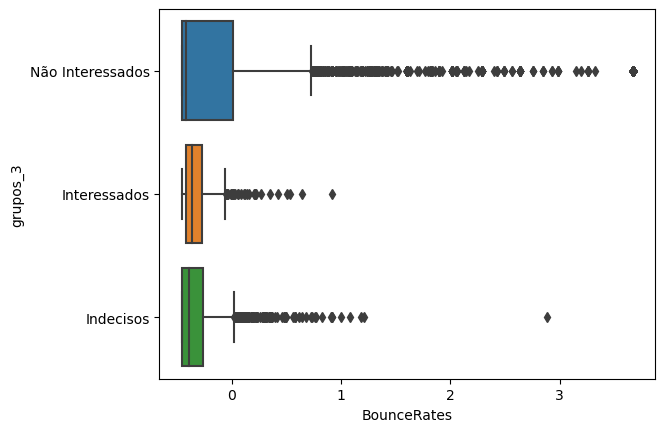

In [84]:
# Gráfico boxplot dos 3 grupos em relação à variável BounceRates
fig, ax = plt.subplots(1, 1)
sns.boxplot(x='BounceRates', y='grupos_3', data=df_pad)
plt.show()

In [91]:
# Faz uma lista com as variaveis do escopo e a BounceRates
variaveis = escopo + ['BounceRates']

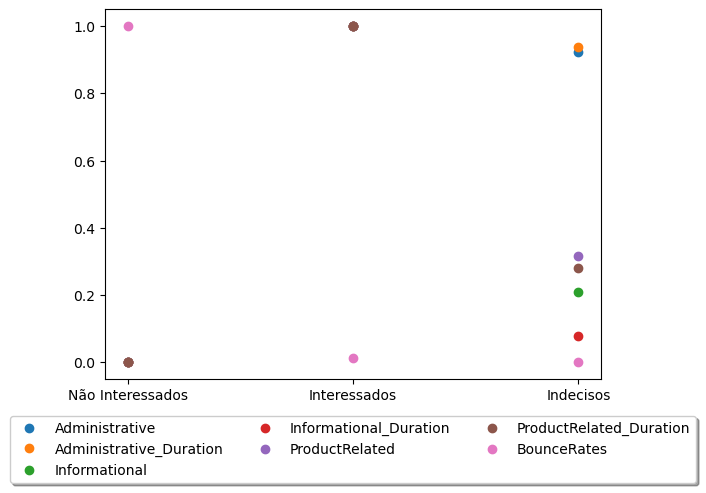

In [96]:
# Gráfico da média padronizada de cada variável da lista para cada grupo
plt.plot(df_pad.groupby(['grupos_3'])[variaveis].mean().apply(padroniza), 'o')
plt.legend(variaveis, loc='lower center', bbox_to_anchor=(0.5, -.3),
          ncol=3, fancybox=True, shadow=True)
plt.show()

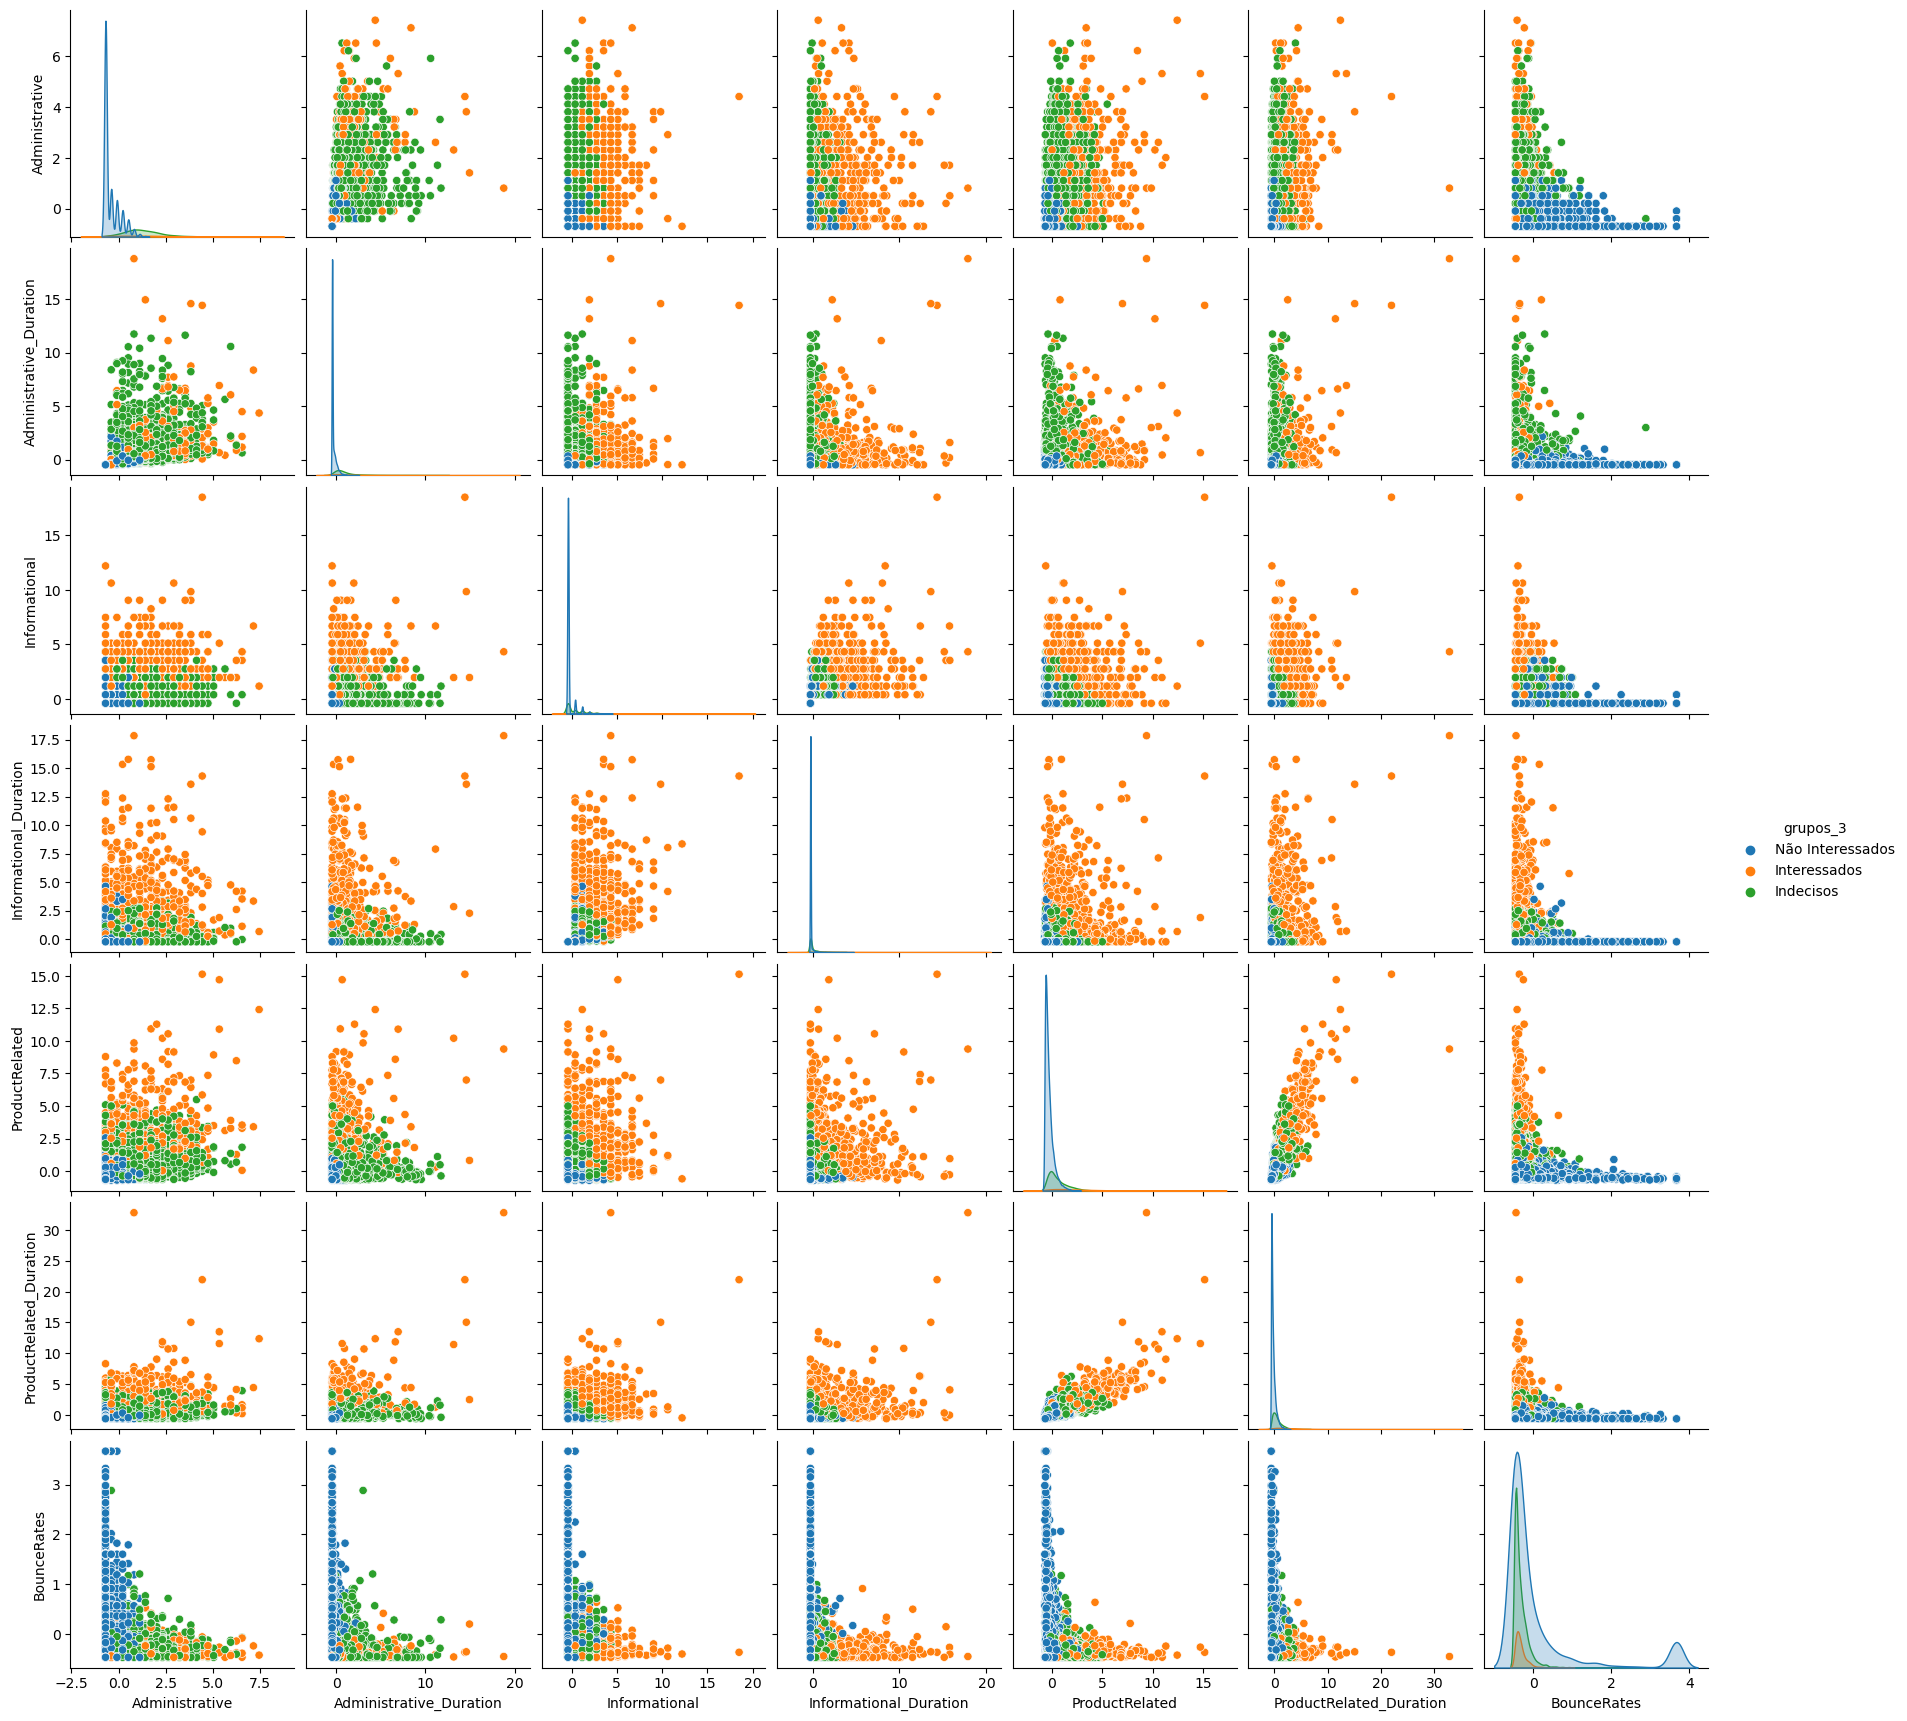

In [97]:
# Faz o pairplot das variáveis numéricas separadas pelo número do grupo
sns.pairplot(df_pad[variaveis + ['grupos_3']], hue='grupos_3')
plt.show()

> A variável _BounceRates_ não aparenta estar fortemente relacionada às outras variáveis do escopo, além disso, vemos que os três grupos apresentam medianas semelhentes em relação a essa variável. A diferença em questão está na média dessa variável para cada grupo, uma vez que ela é alta apenas no grupo dos _Não Interessados_, sendo próxima a zero nos outros dois. Lembrando que a _BounceRates_ é o percentual de clientes que entraram no site e saíram sem acionar outros _requests_, isso causa a impressão de que a pessoa entrou por engano no site de venda e o fechou logo em seguida.
>
> Vejamos agora a relação entre os grupos e a variável _Revenue_.

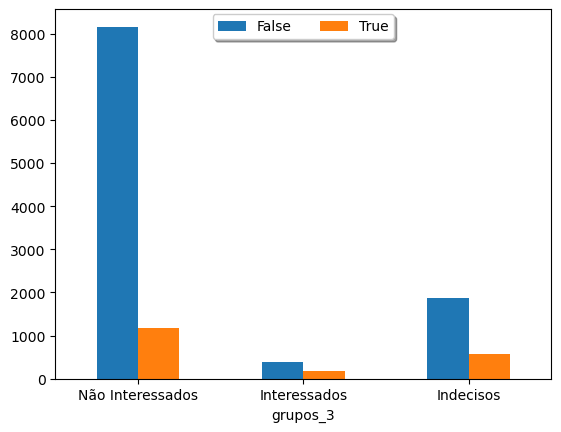

In [103]:
# Gráfico de contagem da variável Revenue em cada grupo
ax = df_pad.groupby(['grupos_3', 'Revenue'])['Revenue'].count().unstack().plot.bar(rot=0)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, .9),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [104]:
# Faz o crosstab da variável Revenue para cada grupo
pd.crosstab(df_pad['Revenue'], df_pad['grupos_3'])

grupos_3  Não Interessados  Interessados  Indecisos
Revenue                                            
False                 8163           382       1877
True                  1168           168        572

> Os resultados da análise da variável _Revenue_ em relação a cada grupo mostra que o cluster com clientes mais propensos a realizarem a compra é dos "Interessados", uma vez que a quantidade de compradores é, aproximadamente, metade dos clientes que não realizaram compras. Nos outros dois grupos, vemos que a proporção é próxima a 1/8 no "Não Interessados" e 1/3 em "Indecisos".